## Import Dependencies

In [4]:
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

## Create Folder Structures

In [38]:
# Setup paths
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [26]:
# Make the directories
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

# Collect Positives and Anchors

## Untar Labelled Faces in the Wild Dataset

In [27]:
# http://vis-www.cs.umass.edu/lfw/

In [28]:
import tarfile
import shutil
import os

with tarfile.open('lfw.tar', 'r') as tar:
    tar.extractall()


In [29]:
# Move LFW Images to the following repository data/negative
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

## Collect Positive and Anchor Classes

In [30]:
# Import uuid library to generate unique image names
import uuid

In [31]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

'data/anchor/f2b6f052-faeb-11ee-8fe8-2a4d3ca375bd.jpg'

In [32]:
import cv2
import os
import uuid



# Create directories if they don't exist
os.makedirs(ANC_PATH, exist_ok=True)
os.makedirs(POS_PATH, exist_ok=True)

# Establish a connection to the webcam
cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    ret, frame = cap.read()
   
    # Cut down frame to 250x250px
    frame = frame[120:120+250, 200:200+250, :]
    
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    key = cv2.waitKey(1) & 0xFF
    
    # Collect anchors 
    if key == ord('a'):
        # Create the unique file path 
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)
        print("Anchor image captured.")
    
    # Collect positives
    elif key == ord('p'):
        # Create the unique file path 
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out positive image
        cv2.imwrite(imgname, frame)
        print("Positive image captured.")
    
    # Breaking gracefully
    elif key == ord('q'):
        break
        
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()


Anchor image captured.
Anchor image captured.
Anchor image captured.
Anchor image captured.
Anchor image captured.
Anchor image captured.
Anchor image captured.
Anchor image captured.
Positive image captured.
Positive image captured.
Positive image captured.
Positive image captured.
Positive image captured.
Positive image captured.
Positive image captured.
Positive image captured.
Positive image captured.
Anchor image captured.
Anchor image captured.


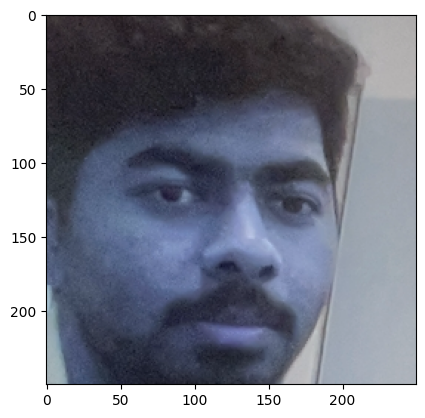

In [33]:
plt.imshow(frame)

# Data Augmentation

In [34]:
def data_aug(img):
    data = []
    for i in range(9):
        img = tf.image.stateless_random_brightness(img, max_delta=0.02, seed=(1,2))
        img = tf.image.stateless_random_contrast(img, lower=0.6, upper=1, seed=(1,3))
        img = tf.image.stateless_random_flip_left_right(img, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_jpeg_quality(img, min_jpeg_quality=90, max_jpeg_quality=100, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_saturation(img, lower=0.9,upper=1, seed=(np.random.randint(100),np.random.randint(100)))
            
        data.append(img)
    
    return data

In [35]:
import os
import uuid

In [36]:
image_paths = []

for filename in os.listdir(ANC_PATH):
    if filename.endswith('.jpg'): 
        img_path = os.path.join(ANC_PATH, filename)
        image_paths.append(img_path)


for img_path in image_paths:

    img = cv2.imread(img_path)
    
    if img is not None:
       
        augmented_images = data_aug(img)
        
        for i, image in enumerate(augmented_images):
            image=np.array(image)
            print(image)
            augmented_img_path = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
            cv2.imwrite(augmented_img_path, image)



[[[ 61  57  58]
  [ 62  58  59]
  [ 54  50  51]
  ...
  [172 170 171]
  [171 169 170]
  [171 169 170]]

 [[ 57  53  54]
  [ 62  58  59]
  [ 57  53  54]
  ...
  [172 170 171]
  [170 168 169]
  [170 168 169]]

 [[ 56  52  53]
  [ 65  61  62]
  [ 58  54  55]
  ...
  [171 169 170]
  [171 169 170]
  [171 169 170]]

 ...

 [[158 168 174]
  [159 169 175]
  [157 168 174]
  ...
  [169 179 183]
  [164 172 177]
  [164 172 177]]

 [[157 167 173]
  [160 170 176]
  [158 169 175]
  ...
  [167 177 181]
  [166 174 179]
  [166 174 179]]

 [[158 168 174]
  [160 170 176]
  [158 169 175]
  ...
  [167 177 181]
  [166 174 179]
  [166 174 179]]]
[[[168 168 168]
  [168 168 168]
  [168 168 168]
  ...
  [ 60  55  59]
  [ 66  62  63]
  [ 66  62  63]]

 [[168 168 168]
  [168 168 168]
  [168 168 168]
  ...
  [ 61  56  60]
  [ 65  61  62]
  [ 63  59  60]]

 [[168 168 168]
  [168 168 168]
  [168 168 168]
  ...
  [ 63  59  60]
  [ 67  63  64]
  [ 64  60  61]]

 ...

 [[162 172 174]
  [164 174 176]
  [166 175 180]
  ..

[[[ 96 105 102]
  [ 91 100  97]
  [ 91 100  97]
  ...
  [160 167 159]
  [156 163 155]
  [156 163 155]]

 [[ 91 100  95]
  [ 97 106 101]
  [ 89  98  93]
  ...
  [157 164 156]
  [157 164 156]
  [157 164 156]]

 [[ 91 102  94]
  [ 94 105  97]
  [ 96 106  98]
  ...
  [157 164 156]
  [159 166 158]
  [159 166 158]]

 ...

 [[156 170 170]
  [160 174 174]
  [159 174 171]
  ...
  [157 175 173]
  [154 172 168]
  [153 173 168]]

 [[162 174 174]
  [160 172 172]
  [160 175 172]
  ...
  [154 172 170]
  [159 177 173]
  [158 178 173]]

 [[162 174 174]
  [160 172 172]
  [160 175 172]
  ...
  [154 172 170]
  [159 177 173]
  [158 178 173]]]
[[[171 173 170]
  [171 173 170]
  [169 171 168]
  ...
  [ 66  64  69]
  [ 74  72  77]
  [ 82  80  85]]

 [[168 170 167]
  [169 171 168]
  [170 172 169]
  ...
  [ 70  68  73]
  [ 73  71  76]
  [ 76  74  79]]

 [[169 171 168]
  [170 172 169]
  [170 172 169]
  ...
  [ 68  66  69]
  [ 74  72  77]
  [ 70  68  73]]

 ...

 [[171 178 186]
  [171 178 186]
  [172 179 187]
  ..

In [40]:
image_paths = []

for filename in os.listdir(POS_PATH):
    print(filename)
    if filename.endswith('.jpg'): 
        img_path = os.path.join(POS_PATH, filename)
        print(img_path)
        image_paths.append(img_path)

for img_path in image_paths:
    
    img = cv2.imread(img_path)
    
    if img is not None:
       
        augmented_images = data_aug(img)
     
        for i, image in enumerate(augmented_images):
            image=np.array(image)
            print(image)
            augmented_img_path = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
            cv2.imwrite(augmented_img_path, image)



0470eece-faec-11ee-8fe8-2a4d3ca375bd.jpg
data/positive/0470eece-faec-11ee-8fe8-2a4d3ca375bd.jpg
06e7579c-faec-11ee-8fe8-2a4d3ca375bd.jpg
data/positive/06e7579c-faec-11ee-8fe8-2a4d3ca375bd.jpg
048a5602-faec-11ee-8fe8-2a4d3ca375bd.jpg
data/positive/048a5602-faec-11ee-8fe8-2a4d3ca375bd.jpg
041a82c8-faec-11ee-8fe8-2a4d3ca375bd.jpg
data/positive/041a82c8-faec-11ee-8fe8-2a4d3ca375bd.jpg
043479e4-faec-11ee-8fe8-2a4d3ca375bd.jpg
data/positive/043479e4-faec-11ee-8fe8-2a4d3ca375bd.jpg
04529b22-faec-11ee-8fe8-2a4d3ca375bd.jpg
data/positive/04529b22-faec-11ee-8fe8-2a4d3ca375bd.jpg
0729a4c6-faec-11ee-8fe8-2a4d3ca375bd.jpg
data/positive/0729a4c6-faec-11ee-8fe8-2a4d3ca375bd.jpg
061c8792-faec-11ee-8fe8-2a4d3ca375bd.jpg
data/positive/061c8792-faec-11ee-8fe8-2a4d3ca375bd.jpg
0401251c-faec-11ee-8fe8-2a4d3ca375bd.jpg
data/positive/0401251c-faec-11ee-8fe8-2a4d3ca375bd.jpg
[[[171 169 170]
  [172 170 171]
  [173 171 172]
  ...
  [ 74  74  74]
  [ 68  68  68]
  [ 74  74  74]]

 [[171 169 170]
  [172 170 171]


[[[170 172 171]
  [168 170 169]
  [168 170 169]
  ...
  [ 65  60  64]
  [ 63  58  62]
  [ 64  59  63]]

 [[172 174 173]
  [170 172 171]
  [168 170 169]
  ...
  [ 60  55  59]
  [ 59  54  58]
  [ 60  55  59]]

 [[171 173 172]
  [169 171 170]
  [168 170 169]
  ...
  [ 59  54  58]
  [ 62  57  61]
  [ 62  57  61]]

 ...

 [[174 179 185]
  [173 178 184]
  [172 177 183]
  ...
  [167 173 183]
  [171 177 187]
  [170 176 186]]

 [[173 178 184]
  [174 179 185]
  [174 179 185]
  ...
  [170 176 186]
  [172 178 188]
  [170 176 186]]

 [[173 178 184]
  [174 179 185]
  [174 179 185]
  ...
  [170 176 186]
  [170 176 186]
  [168 174 184]]]
[[[167 171 170]
  [165 169 168]
  [164 168 167]
  ...
  [ 69  64  68]
  [ 68  63  67]
  [ 68  63  67]]

 [[169 173 172]
  [166 170 169]
  [164 168 167]
  ...
  [ 65  60  64]
  [ 65  60  64]
  [ 65  60  64]]

 [[168 172 171]
  [166 170 169]
  [164 168 167]
  ...
  [ 64  59  63]
  [ 66  61  65]
  [ 66  61  65]]

 ...

 [[172 177 183]
  [171 176 182]
  [170 175 181]
  ..

# Load and Preprocess Images

## Getting Image Directories

In [57]:
import os
import tensorflow as tf

# Setup paths
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

# Create TensorFlow datasets
anchor_dataset = tf.data.Dataset.list_files(os.path.join(ANC_PATH, '*.jpg')).take(3000)
positive_dataset = tf.data.Dataset.list_files(os.path.join(POS_PATH, '*.jpg')).take(3000)
negative_dataset = tf.data.Dataset.list_files(os.path.join(NEG_PATH, '*.jpg')).take(3000)

# Verify the datasets
print("Anchor Dataset:")
for file_path in anchor_dataset:
    print(file_path)

print("\nPositive Dataset:")
for file_path in positive_dataset:
    print(file_path)

print("\nNegative Dataset:")
for file_path in negative_dataset:
    print(file_path)


Anchor Dataset:
tf.Tensor(b'data/anchor/117f3a08-faec-11ee-8fe8-2a4d3ca375bd.jpg', shape=(), dtype=string)
tf.Tensor(b'data/anchor/02fdc378-faec-11ee-8fe8-2a4d3ca375bd.jpg', shape=(), dtype=string)
tf.Tensor(b'data/anchor/119990ce-faec-11ee-8fe8-2a4d3ca375bd.jpg', shape=(), dtype=string)
tf.Tensor(b'data/anchor/11674038-faec-11ee-8fe8-2a4d3ca375bd.jpg', shape=(), dtype=string)
tf.Tensor(b'data/anchor/1160d360-faec-11ee-8fe8-2a4d3ca375bd.jpg', shape=(), dtype=string)
tf.Tensor(b'data/anchor/118c21c8-faec-11ee-8fe8-2a4d3ca375bd.jpg', shape=(), dtype=string)
tf.Tensor(b'data/anchor/11738a8c-faec-11ee-8fe8-2a4d3ca375bd.jpg', shape=(), dtype=string)
tf.Tensor(b'data/anchor/1199d4f8-faec-11ee-8fe8-2a4d3ca375bd.jpg', shape=(), dtype=string)
tf.Tensor(b'data/anchor/11863c22-faec-11ee-8fe8-2a4d3ca375bd.jpg', shape=(), dtype=string)
tf.Tensor(b'data/anchor/11860900-faec-11ee-8fe8-2a4d3ca375bd.jpg', shape=(), dtype=string)
tf.Tensor(b'data/anchor/116d5cf2-faec-11ee-8fe8-2a4d3ca375bd.jpg', shape=(

In [44]:
dir_test = anchor_dataset.as_numpy_iterator()

In [47]:
print(dir_test.next())

b'data/anchor/11863c22-faec-11ee-8fe8-2a4d3ca375bd.jpg'


## Preprocessing - Scale and Resize

In [16]:
def preprocess(file_path):
    
    byte_img = tf.io.read_file(file_path)

    img = tf.io.decode_jpeg(byte_img)
    
    img = tf.image.resize(img, (100,100))
    
    img = img / 255.0

    return img

In [17]:
file_path = 'data/anchor/1199f64a-faec-11ee-8fe8-2a4d3ca375bd.jpg'
img=preprocess(file_path)

In [18]:
img.numpy().max() 

0.7737745

## Create Labelled Dataset

In [19]:
# (anchor, positive) => 1,1,1,1,1
# (anchor, negative) => 0,0,0,0,0

In [20]:
# Create TensorFlow datasets
# Setup paths
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

anchor_dataset = tf.data.Dataset.list_files(os.path.join(ANC_PATH, '*.jpg')).take(3000)
positive_dataset = tf.data.Dataset.list_files(os.path.join(POS_PATH, '*.jpg')).take(3000)
negative_dataset = tf.data.Dataset.list_files(os.path.join(NEG_PATH, '*.jpg')).take(3000)

positives = tf.data.Dataset.zip((anchor_dataset, positive_dataset, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor_dataset)))))
negatives = tf.data.Dataset.zip((anchor_dataset, negative_dataset, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor_dataset)))))
data = positives.concatenate(negatives)

In [21]:
samples = data.as_numpy_iterator()

In [22]:
example = samples.next()

In [23]:
example

(b'data/anchor/118c8bf4-faec-11ee-8fe8-2a4d3ca375bd.jpg',
 b'data/positive/048a5602-faec-11ee-8fe8-2a4d3ca375bd.jpg',
 1.0)

## Build Train and Test Partition

In [24]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [25]:
res = preprocess_twin(*example)

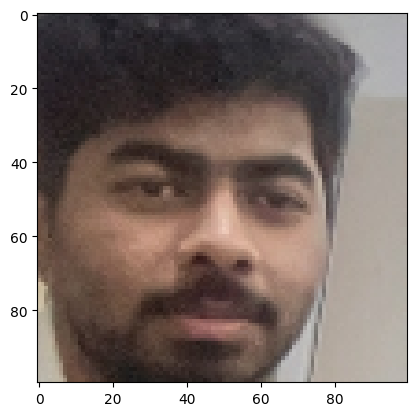

In [26]:
plt.imshow(res[1])

In [27]:
res[2]

1.0

In [28]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle()

In [29]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [30]:
# Testing partition
#test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

# Model Engineering

## Build Embedding Layer

In [72]:
inp = Input(shape=(100,100,3), name='input_image')

In [73]:
c1 = Conv2D(64, (10,10), activation='relu')(inp)

In [74]:
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

In [75]:
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

In [76]:
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [77]:
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [78]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [79]:
mod.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2  (None, 46, 46, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 20, 20, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 128)       26

In [80]:
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')
    
    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [81]:
embedding = make_embedding()

In [82]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 46, 46, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 20, 20, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 17, 17, 128)       26

## Build Distance Layer

In [39]:
# Siamese L1 Distance class
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [84]:
l1 = L1Dist()

## Make Siamese Model

In [87]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

In [88]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [89]:
siamese_layer = L1Dist()

In [90]:
distances = siamese_layer(inp_embedding, val_embedding)

In [91]:
classifier = Dense(1, activation='sigmoid')(distances)

In [92]:
classifier

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2')>

In [93]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [94]:
siamese_network.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

In [95]:
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [96]:
siamese_model = make_siamese_model()

In [97]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

# Training

## Setup Loss and Optimizer

In [98]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [99]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

## Build Train Step Function

In [31]:
test_batch = train_data.as_numpy_iterator()

In [32]:
batch_1 = test_batch.next()

In [33]:
X = batch_1[:2]

In [34]:
y = batch_1[2]

In [35]:
y

array([1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.],
      dtype=float32)

In [106]:
tf.losses.BinaryCrossentropy??

In [107]:
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
        
    # Return loss
    return loss

## Build Training Loop

In [108]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [109]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Creating a metric object 
        r = Recall()
        p = Precision()
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat) 
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())
        
       

## Train the model

In [110]:
EPOCHS = 50

In [111]:
train(train_data, EPOCHS)


 Epoch 1/50
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
9/9 [==============================] - 66s 7s/step
0.48581752 0.015384615 1.0

 Epoch 2/50
9/9 [==============================] - 50s 5s/step
0.03361451 0.12903225 1.0

 Epoch 3/50
9/9 [==============================] - 51s 6s/step
0.5372681 0.40983605 1.0

 Epoch 4/50
9/9 [==============================] - 61s 7s/step
0.1291675 0.8769231 1.0

 Epoch 5/50
9/9 [==============================] - 79s 9s/step
0.28697482 0.92424244 1.0

 Epoch 6/50
9/9 [==============================] - 61s 7s/step
0.13894056 0.9672131 0.98333335

 Epoch 7/50
9/9 [==============================] - 59s 7s/step
0.20471255 1.0 0.984127

 Epoch 8/50
9/9 [==============================] - 60s 7s/step
0.0652501 0.98275864 1.0

 Epoch 9/50
9/9 [==============================] - 55s 6s/step
0.0098777525 1.0 1.0

 Epoch 10/50
9/9 [=====================

9/9 [==============================] - 42s 5s/step
0.0073654964 1.0 1.0

 Epoch 31/50
9/9 [==============================] - 42s 5s/step
0.010633811 1.0 1.0

 Epoch 32/50
9/9 [==============================] - 42s 5s/step
0.00029488126 1.0 1.0

 Epoch 33/50
9/9 [==============================] - 45s 5s/step
0.010728767 1.0 1.0

 Epoch 34/50
9/9 [==============================] - 47s 5s/step
0.00023565526 1.0 1.0

 Epoch 35/50
9/9 [==============================] - 50s 5s/step
0.002092646 1.0 1.0

 Epoch 36/50
9/9 [==============================] - 52s 6s/step
1.5866919e-05 1.0 1.0

 Epoch 37/50
9/9 [==============================] - 55s 6s/step
0.0076191155 1.0 1.0

 Epoch 38/50
9/9 [==============================] - 58s 6s/step
0.03381472 1.0 1.0

 Epoch 39/50
9/9 [==============================] - 58s 6s/step
7.891796e-06 1.0 1.0

 Epoch 40/50
9/9 [==============================] - 59s 6s/step
0.006209675 0.9830508 1.0

 Epoch 41/50
9/9 [==============================] - 67s 8s/step


# 6. Evaluate Model

## Import Metrics

In [112]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

## Make Predictions

In [69]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [70]:
# Reload model 
siamese_model = tf.keras.models.load_model('siamesemodelv2.h5', 
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

y_hat = siamese_model.predict([test_input, test_val])

1/1 [==============================] - 1s 901ms/step


In [71]:
# Post processing the results 
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1]

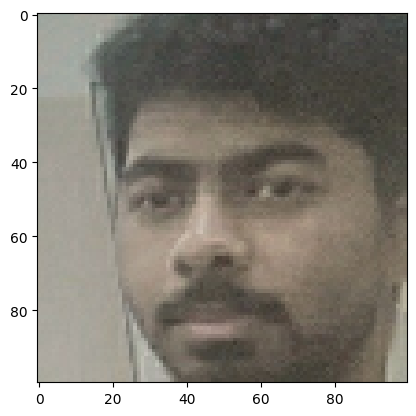

In [72]:
plt.imshow(test_input[1])

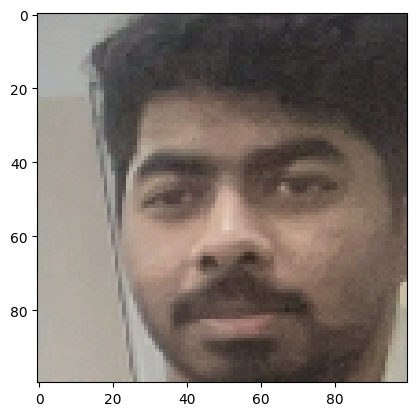

In [73]:
plt.imshow(test_val[1])

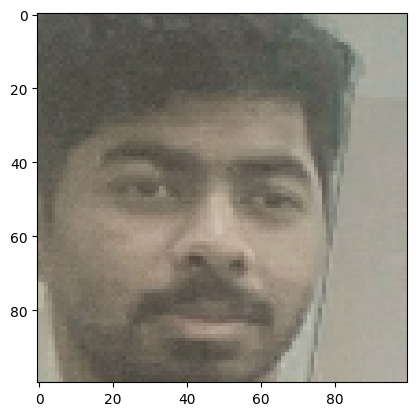

In [74]:
plt.imshow(test_input[0])

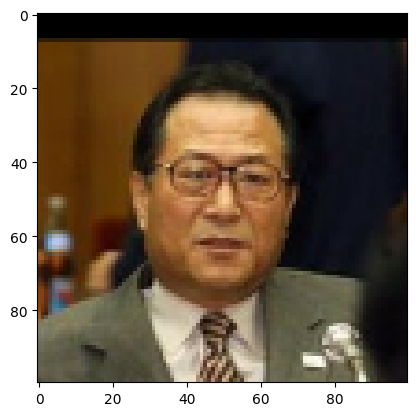

In [75]:
plt.imshow(test_val[0])

In [42]:
y_true

array([0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
      dtype=float32)

## Calculate Metrics

In [117]:
# Creating a metric object 
m = Recall()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [118]:
# Creating a metric object 
m = Precision()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [119]:
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat) 

print(r.result().numpy(), p.result().numpy())

1/1 [==============================] - 1s 619ms/step
1.0 1.0


# Save Model

In [121]:
# Save weights
siamese_model.save('siamesemodelv2.h5')

/Users/dhikshitha./anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
# Reload model 
siamese_model = tf.keras.models.load_model('siamesemodelv2.h5', 
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [17]:
# View model summary
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

# Real Time Test

## Verification Function

In [18]:
os.listdir(os.path.join('application_data', 'verification_images'))

['573ec130-faec-11ee-8fe8-2a4d3ca375bd-Copy1.jpg',
 '574bdf0a-faec-11ee-8fe8-2a4d3ca375bd-Copy1.jpg',
 '5744e088-faec-11ee-8fe8-2a4d3ca375bd-Copy1.jpg',
 '573e93ae-faec-11ee-8fe8-2a4d3ca375bd-Copy1.jpg',
 '574b8e74-faec-11ee-8fe8-2a4d3ca375bd-Copy1.jpg',
 '573efb96-faec-11ee-8fe8-2a4d3ca375bd-Copy1.jpg',
 '574b65f2-faec-11ee-8fe8-2a4d3ca375bd-Copy1.jpg',
 '5744cc6a-faec-11ee-8fe8-2a4d3ca375bd-Copy1.jpg',
 '5745089c-faec-11ee-8fe8-2a4d3ca375bd-Copy1.jpg',
 '57451c60-faec-11ee-8fe8-2a4d3ca375bd-Copy1.jpg',
 '574bca9c-faec-11ee-8fe8-2a4d3ca375bd-Copy1.jpg',
 '573f0e38-faec-11ee-8fe8-2a4d3ca375bd-Copy1.jpg',
 '574556f8-faec-11ee-8fe8-2a4d3ca375bd-Copy1.jpg',
 '574bb624-faec-11ee-8fe8-2a4d3ca375bd-Copy1.jpg',
 '57453042-faec-11ee-8fe8-2a4d3ca375bd-Copy1.jpg',
 '573ed51c-faec-11ee-8fe8-2a4d3ca375bd-Copy1.jpg',
 '57454384-faec-11ee-8fe8-2a4d3ca375bd-Copy1.jpg',
 '5744f42e-faec-11ee-8fe8-2a4d3ca375bd-Copy1.jpg',
 '573ee89a-faec-11ee-8fe8-2a4d3ca375bd-Copy1.jpg',
 '574ba274-faec-11ee-8fe8-2a4d3

In [19]:
os.path.join('application_data', 'input_image', 'input_image.jpg')

'application_data/input_image/input_image.jpg'

In [20]:
for image in os.listdir(os.path.join('application_data', 'verification_images')):
    validation_img = os.path.join('application_data', 'verification_images', image)
    print(validation_img)

application_data/verification_images/573ec130-faec-11ee-8fe8-2a4d3ca375bd-Copy1.jpg
application_data/verification_images/574bdf0a-faec-11ee-8fe8-2a4d3ca375bd-Copy1.jpg
application_data/verification_images/5744e088-faec-11ee-8fe8-2a4d3ca375bd-Copy1.jpg
application_data/verification_images/573e93ae-faec-11ee-8fe8-2a4d3ca375bd-Copy1.jpg
application_data/verification_images/574b8e74-faec-11ee-8fe8-2a4d3ca375bd-Copy1.jpg
application_data/verification_images/573efb96-faec-11ee-8fe8-2a4d3ca375bd-Copy1.jpg
application_data/verification_images/574b65f2-faec-11ee-8fe8-2a4d3ca375bd-Copy1.jpg
application_data/verification_images/5744cc6a-faec-11ee-8fe8-2a4d3ca375bd-Copy1.jpg
application_data/verification_images/5745089c-faec-11ee-8fe8-2a4d3ca375bd-Copy1.jpg
application_data/verification_images/57451c60-faec-11ee-8fe8-2a4d3ca375bd-Copy1.jpg
application_data/verification_images/574bca9c-faec-11ee-8fe8-2a4d3ca375bd-Copy1.jpg
application_data/verification_images/573f0e38-faec-11ee-8fe8-2a4d3ca375bd-Co

In [59]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified

In [65]:
results, verified = verify(siamese_model, 0.8, 0.8)

1/1 [==============================] - 0s 145ms/step


In [66]:
verified

True

## OpenCV Real Time Verification

In [78]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    if (frame is not None):
        frame = frame[120:120+250,200:200+250, :]
        cv2.imshow('Verification', frame)

        # Verification trigger
        if cv2.waitKey(10) & 0xFF == ord('v'):

            cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
            results, verified = verify(siamese_model, 0.8, 0.8)
            print(verified)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 193ms/step
True
1/1 [==============================] - 0s 144ms/step
False
